In [1]:
import sys
import os

# Get the parent directory (project root) and add it to the path at the beginning
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

# Remove any existing raincloudpy paths from sys.path
sys.path = [p for p in sys.path if 'raincloudpy' not in p.lower() or project_root in p]

# Insert project root at the beginning to prioritize local version
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print(f"Project root: {project_root}")
print(f"sys.path[0]: {sys.path[0]}")

# Remove raincloudpy from sys.modules to force a fresh import
for module in list(sys.modules.keys()):
    if module.startswith('raincloudpy'):
        del sys.modules[module]

# Now import the local version
from raincloudpy import raincloudplot
import raincloudpy

print(f"\nImporting from: {raincloudpy.__file__}")
print(f"Expected: {project_root}\\raincloudpy\\__init__.py")

Project root: p:\CodeProjects\Current\python-packages\raincloudpy
sys.path[0]: p:\CodeProjects\Current\python-packages\raincloudpy

Importing from: p:\CodeProjects\Current\python-packages\raincloudpy\raincloudpy\__init__.py
Expected: p:\CodeProjects\Current\python-packages\raincloudpy\raincloudpy\__init__.py

Importing from: p:\CodeProjects\Current\python-packages\raincloudpy\raincloudpy\__init__.py
Expected: p:\CodeProjects\Current\python-packages\raincloudpy\raincloudpy\__init__.py


In [2]:
# Check which version of raincloudpy is being used
import raincloudpy
import raincloudpy.raincloud

print("raincloudpy package location:", raincloudpy.__file__)
print("raincloud module location:", raincloudpy.raincloud.__file__)

# Check the function signature to see if n_groups parameter exists
import inspect
sig = inspect.signature(raincloudpy.raincloud._add_half_violin)
print("\n_add_half_violin parameters:", list(sig.parameters.keys()))

raincloudpy package location: p:\CodeProjects\Current\python-packages\raincloudpy\raincloudpy\__init__.py
raincloud module location: p:\CodeProjects\Current\python-packages\raincloudpy\raincloudpy\raincloud.py

_add_half_violin parameters: ['ax', 'position', 'y_vals', 'color', 'violin_width', 'n_groups', 'kwargs']


p:\CodeProjects\Current\python-packages\raincloudpy\raincloudpy\raincloud.py:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


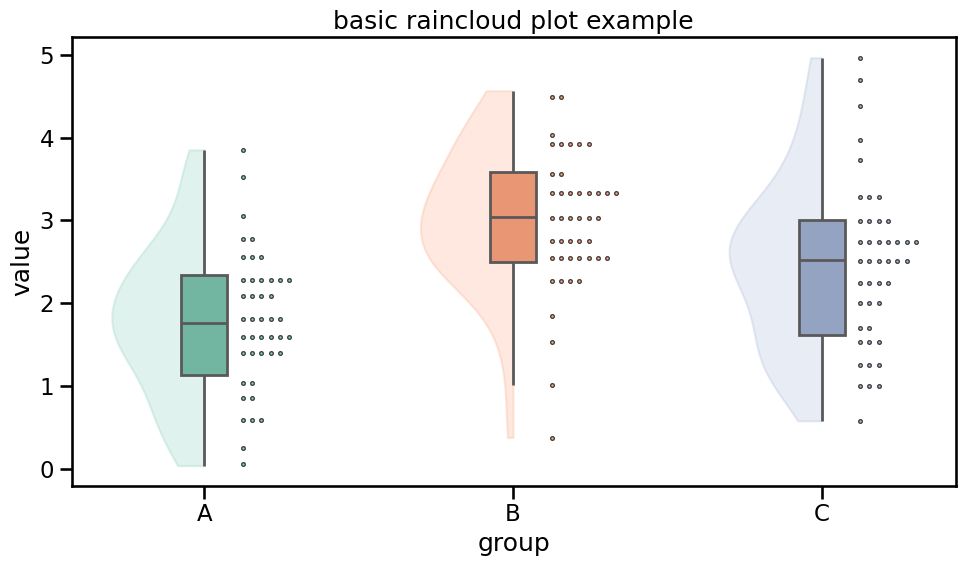

In [3]:
"""
Basic example of creating a raincloud plot.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from raincloudpy import raincloudplot
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data
df = pd.DataFrame({
    'group': ['A'] * 50 + ['B'] * 50 + ['C'] * 50,
    'value': np.concatenate([
        np.random.randn(50) + 2,
        np.random.randn(50) + 3,
        np.random.randn(50) + 2.5
    ])
})

# Create raincloud plot
# fig, ax = plt.subplots(figsize=(10, 6))
plt.figure(figsize=(10, 6))
sns.set_context('talk')
raincloudplot(data=df, x='group', y='value', palette='Set2')
plt.title('basic raincloud plot example')
plt.ylabel('value')
plt.xlabel('group')
plt.tight_layout()
plt.show()


p:\CodeProjects\Current\python-packages\raincloudpy\raincloudpy\raincloud.py:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


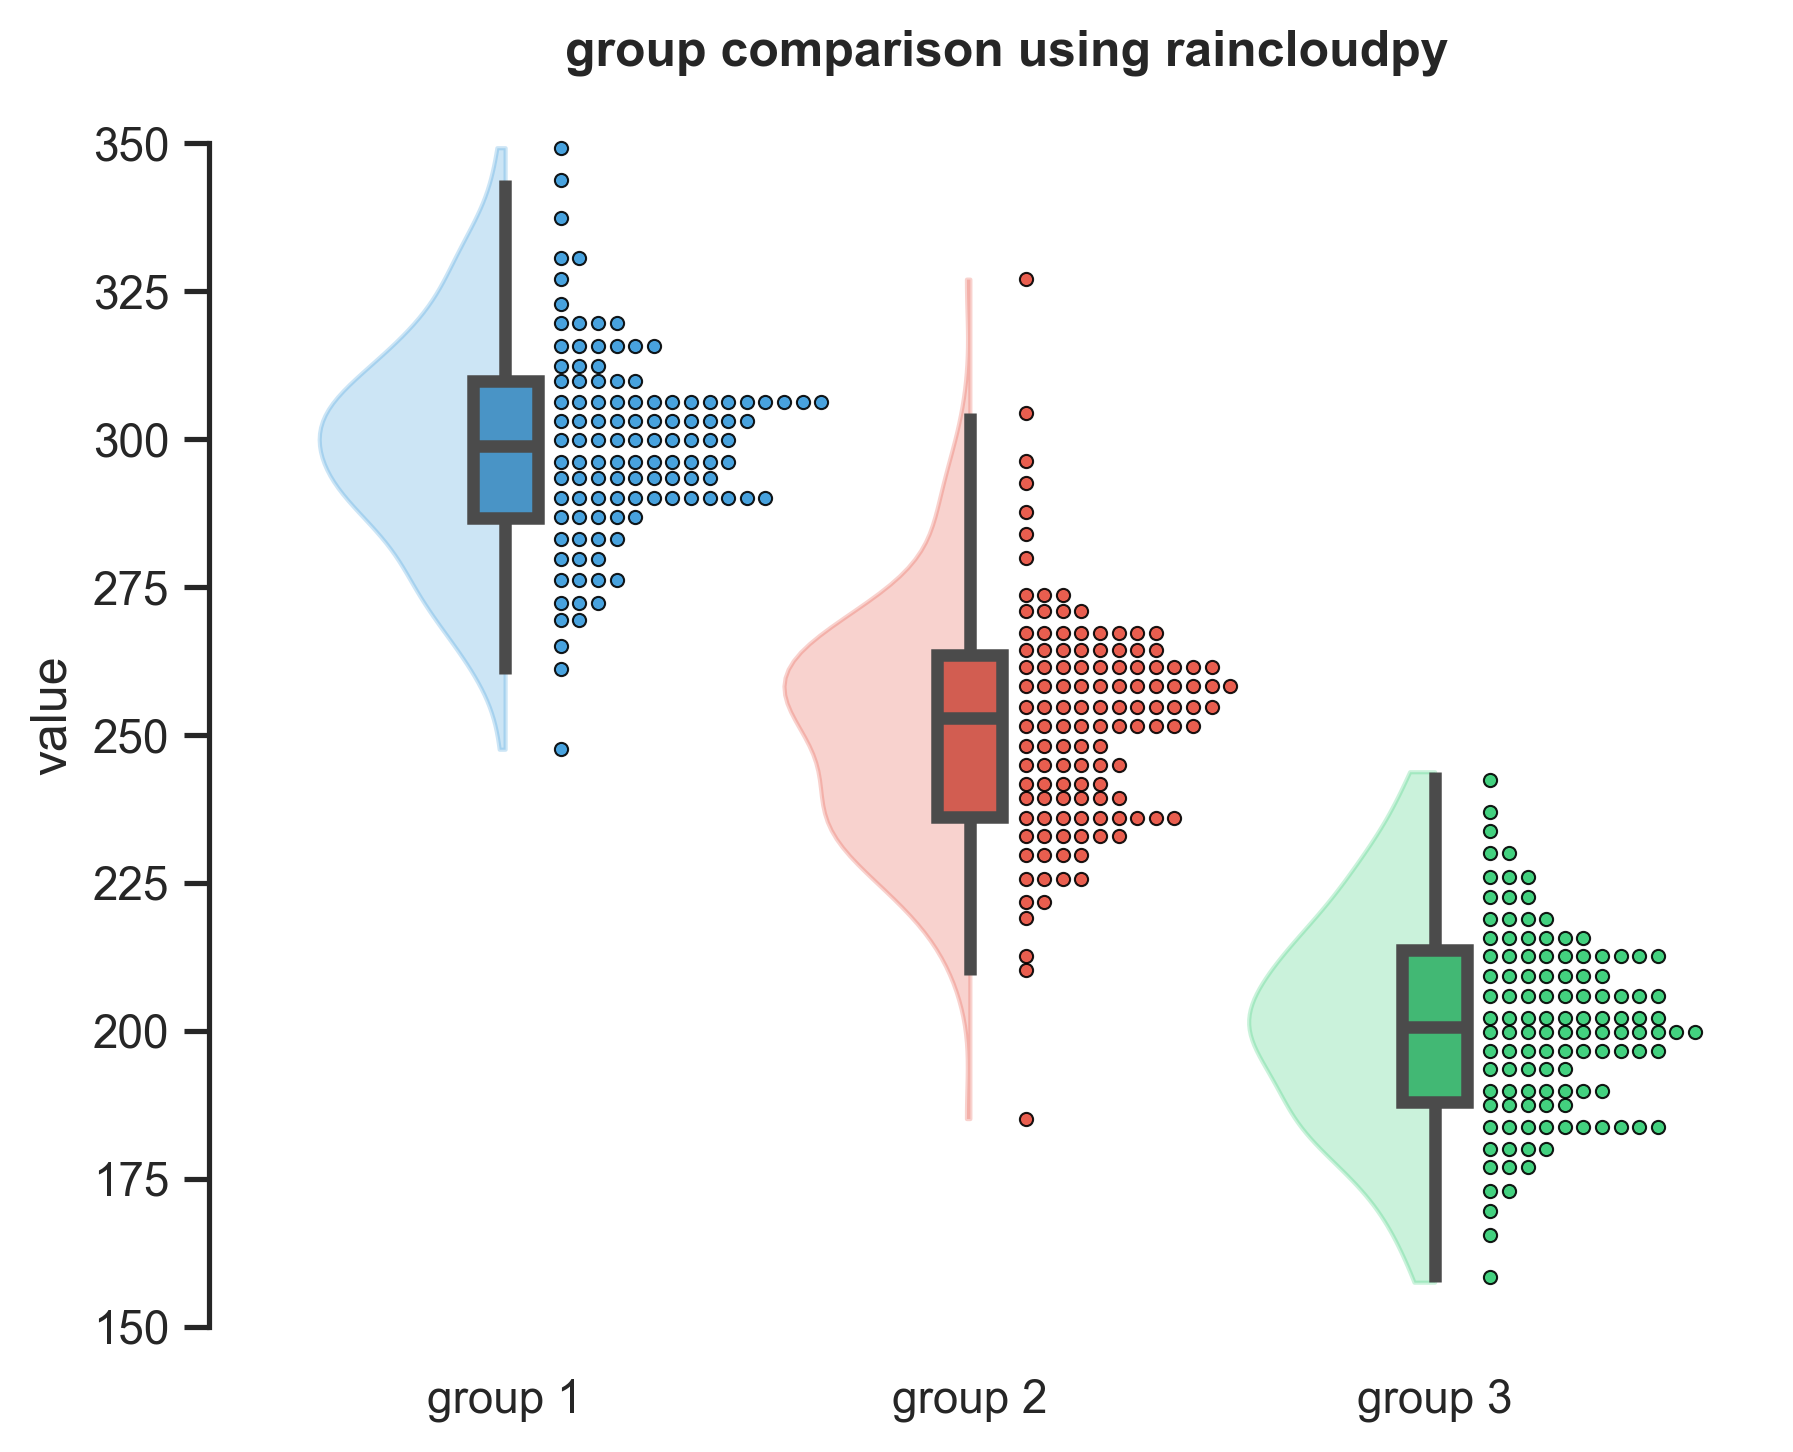

In [4]:
"""
Advanced example with customized raincloud plot.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data mimicking value comparison
N = 150
df_test = pd.DataFrame({
    'group': ['group 1'] * N + ['group 2'] * N + ['group 3'] * N,
    'value': np.concatenate([
        np.random.normal(loc=300, scale=20, size=N),
        np.random.normal(loc=250, scale=20, size=N),
        np.random.normal(loc=200, scale=20, size=N)
    ])
})




sns.set_style("ticks")
sns.set_context("notebook")

# Create customized raincloud plot
plt.figure(figsize=(6, 5), dpi=300)
raincloudplot(
    data=df_test, 
    x='group', 
    y='value',
    order=['group 1', 'group 2', 'group 3'],
    palette=['#3498db', '#e74c3c', '#2ecc71'],
    box_width=0.14,
    violin_width=0.4,
    dot_size=10,
    dot_spacing=0.04,
    y_threshold=3,
    box_kwargs={'linewidth': 3},
    scatter_kwargs={'alpha': 0.9, 'edgecolor': 'black', 'linewidth': 0.5},
    violin_kwargs={'alpha': 0.25},
)


plt.title('group comparison using raincloudpy', fontweight='bold')
plt.ylabel('value')
plt.xlabel('')
plt.tight_layout()
sns.despine(offset=10, trim=True, bottom=True)
plt.tick_params(axis='x', which='both', bottom=False, top=False)



p:\CodeProjects\Current\python-packages\raincloudpy\raincloudpy\raincloud.py:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
p:\CodeProjects\Current\python-packages\raincloudpy\raincloudpy\raincloud.py:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
p:\CodeProjects\Current\python-packages\raincloudpy\raincloudpy\raincloud.py:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


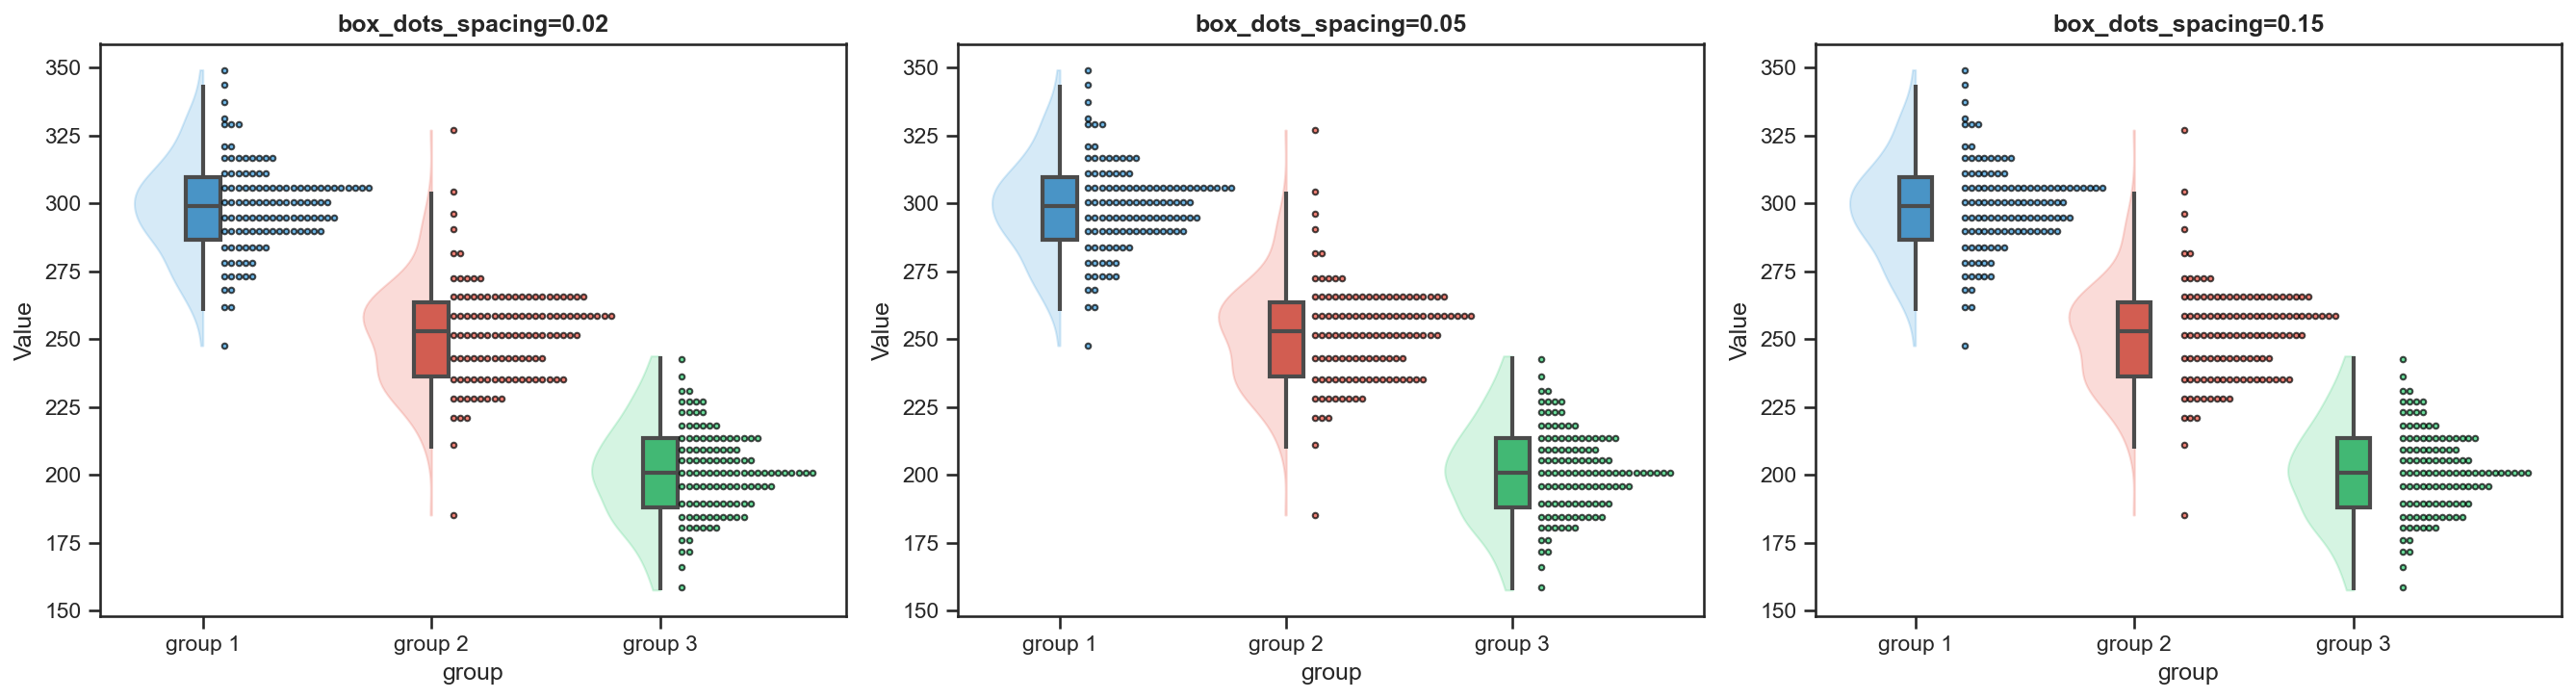

In [5]:
"""
Test box_dots_spacing parameter
"""
fig, axes = plt.subplots(1, 3, figsize=(18, 5), dpi=150)
sns.set_style("whitegrid")

# Different box_dots_spacing values
for i, (spacing, ax) in enumerate(zip([0.02, 0.05, 0.15], axes)):
    raincloudplot(
        data=df_test, 
        x='group', 
        y='value',
        palette=['#3498db', '#e74c3c', '#2ecc71'],
        box_dots_spacing=spacing,
        ax=ax
    )
    ax.set_title(f'box_dots_spacing={spacing}', fontweight='bold')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

p:\CodeProjects\Current\python-packages\raincloudpy\raincloudpy\raincloud.py:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
p:\CodeProjects\Current\python-packages\raincloudpy\raincloudpy\raincloud.py:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
p:\CodeProjects\Current\python-packages\raincloudpy\raincloudpy\raincloud.py:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


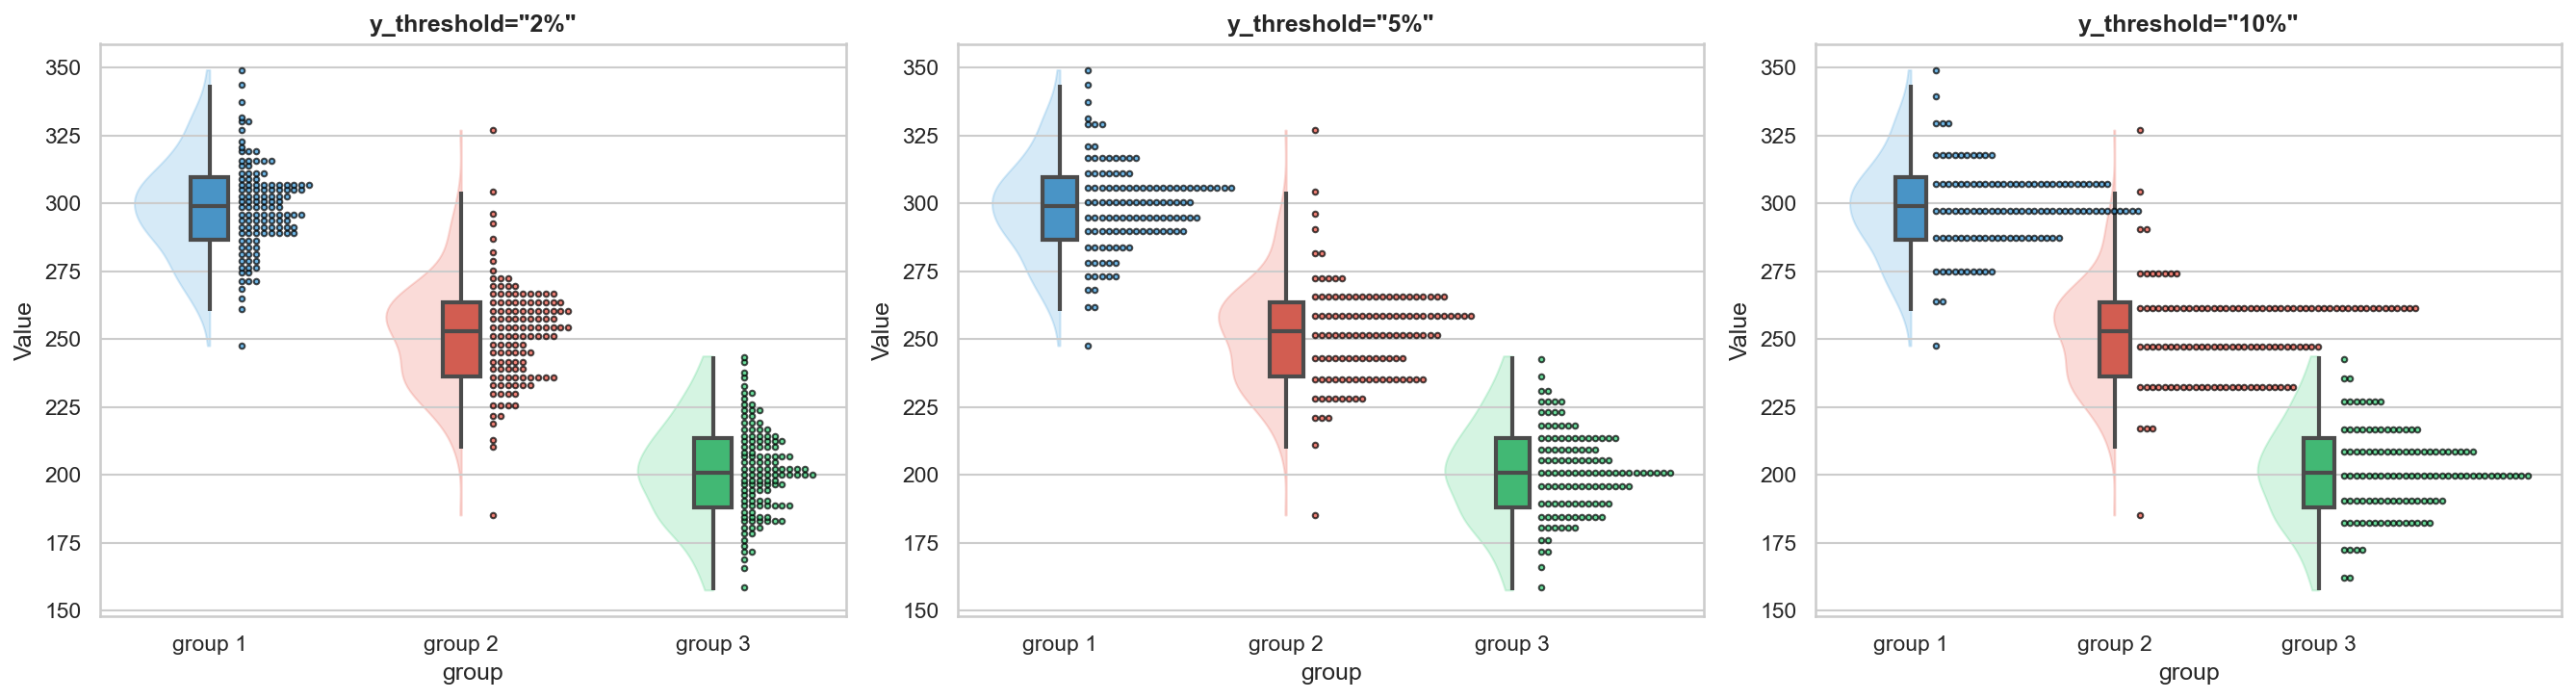

In [6]:
"""
Compare different percentage thresholds
"""
fig, axes = plt.subplots(1, 3, figsize=(18, 5), dpi=150)
sns.set_style("whitegrid")

# Different percentage thresholds
for i, (threshold, ax) in enumerate(zip(["2%", "5%", "10%"], axes)):
    raincloudplot(
        data=df_test, 
        x='group', 
        y='value',
        palette=['#3498db', '#e74c3c', '#2ecc71'],
        y_threshold=threshold,
        ax=ax
    )
    ax.set_title(f'y_threshold="{threshold}"', fontweight='bold')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

p:\CodeProjects\Current\python-packages\raincloudpy\raincloudpy\raincloud.py:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
p:\CodeProjects\Current\python-packages\raincloudpy\raincloudpy\raincloud.py:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
p:\CodeProjects\Current\python-packages\raincloudpy\raincloudpy\raincloud.py:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


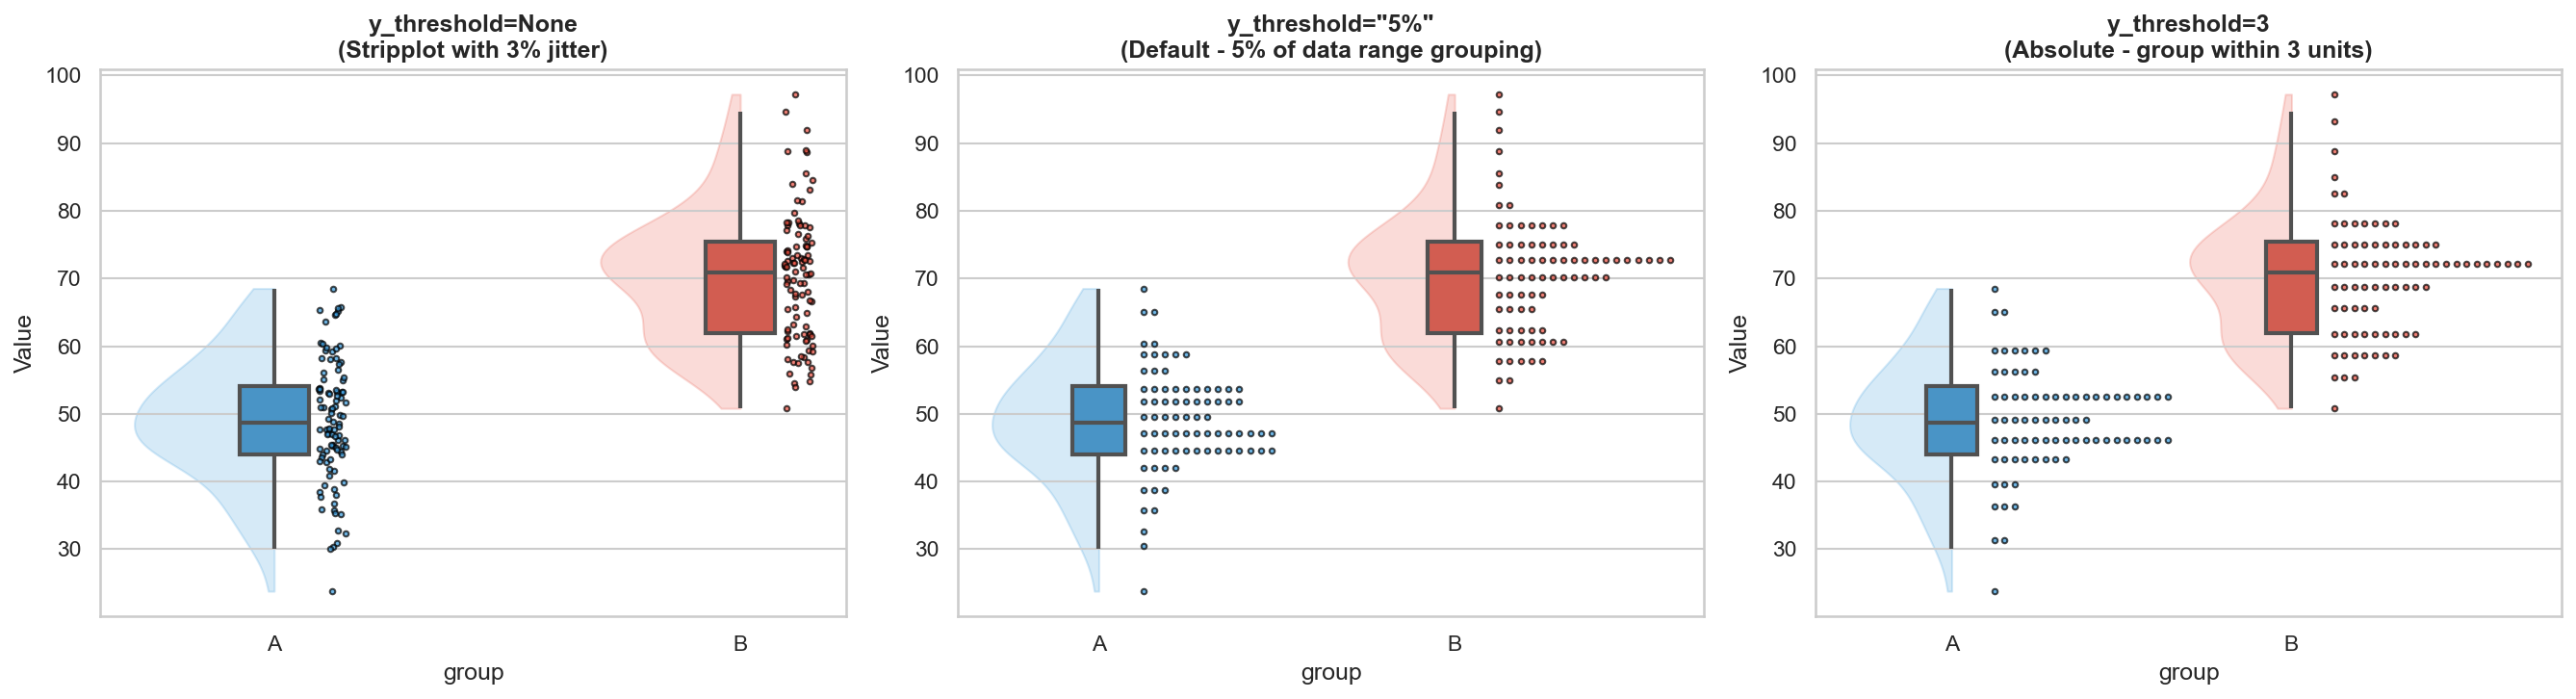

In [7]:
"""
Test y_threshold: None (stripplot with jitter) vs grouped modes
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
N = 100
df_test = pd.DataFrame({
    'group': ['A'] * N + ['B'] * N,
    'value': np.concatenate([
        np.random.normal(loc=50, scale=10, size=N),
        np.random.normal(loc=70, scale=10, size=N)
    ])
})

fig, axes = plt.subplots(1, 3, figsize=(18, 5), dpi=150)
sns.set_style("whitegrid")

# Test 1: y_threshold=None (stripplot with 3% jitter)
raincloudplot(
    data=df_test, 
    x='group', 
    y='value',
    palette=['#3498db', '#e74c3c'],
    y_threshold=None,
    ax=axes[0]
)
axes[0].set_title('y_threshold=None\n(Stripplot with 3% jitter)', fontweight='bold')
axes[0].set_ylabel('Value')

# Test 2: y_threshold="5%" (default - percentage grouping)
raincloudplot(
    data=df_test, 
    x='group', 
    y='value',
    palette=['#3498db', '#e74c3c'],
    y_threshold="5%",
    ax=axes[1]
)
axes[1].set_title('y_threshold="5%"\n(Default - 5% of data range grouping)', fontweight='bold')
axes[1].set_ylabel('Value')

# Test 3: y_threshold=3 (absolute grouping)
raincloudplot(
    data=df_test, 
    x='group', 
    y='value',
    palette=['#3498db', '#e74c3c'],
    y_threshold=3,
    ax=axes[2]
)
axes[2].set_title('y_threshold=3\n(Absolute - group within 3 units)', fontweight='bold')
axes[2].set_ylabel('Value')

plt.tight_layout()
plt.show()

## Testing `y_threshold` Parameter

The `y_threshold` parameter controls how y-values are grouped together for scatter point alignment:
- **`None`**: Stripplot with 3% jitter (random scatter like traditional stripplot)
- **`"5%"`** (default): Percentage of data range for grouping (e.g., "5%", "10%")
- **Numeric value**: Absolute threshold for grouping (e.g., 3, 5.5)

p:\CodeProjects\Current\python-packages\raincloudpy\raincloudpy\raincloud.py:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
p:\CodeProjects\Current\python-packages\raincloudpy\raincloudpy\raincloud.py:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


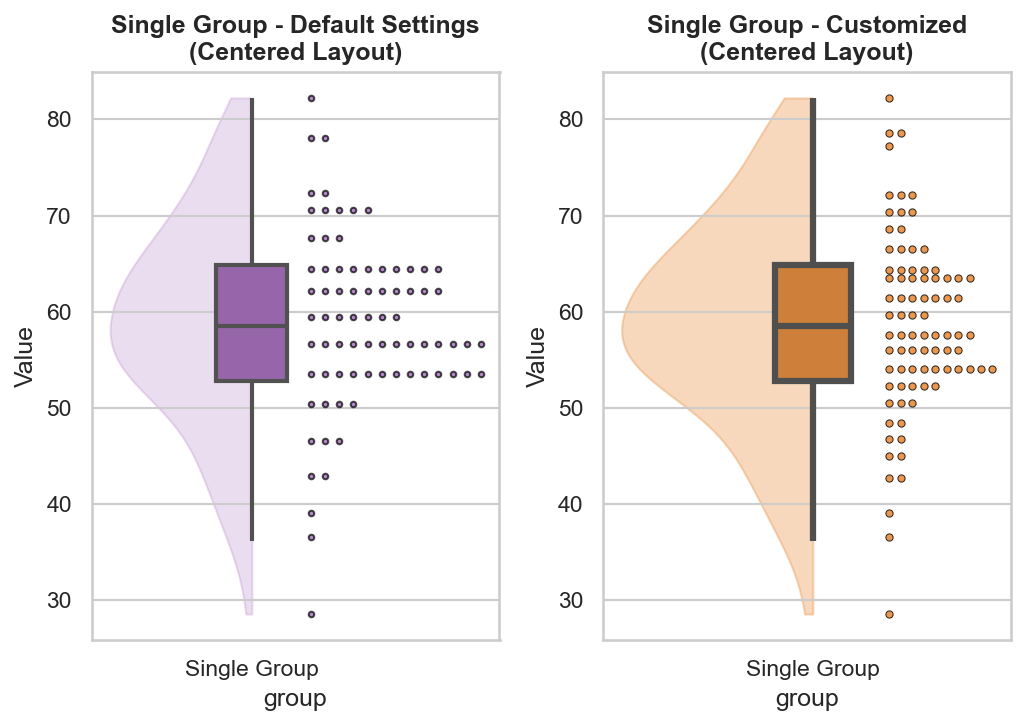

In [10]:
"""
Test single group data (centered layout)
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from raincloudpy import raincloudplot

np.random.seed(42)
N = 100

# Create single group data
df_single = pd.DataFrame({
    'group': ['Single Group'] * N,
    'value': np.random.normal(loc=60, scale=12, size=N)
})

fig, axes = plt.subplots(1, 2, figsize=(7, 5), dpi=150)
sns.set_style("whitegrid")

# Test 1: Single group with default settings
raincloudplot(
    data=df_single, 
    x='group', 
    y='value',
    palette=['#9b59b6'],
    ax=axes[0]
)
axes[0].set_title('Single Group - Default Settings\n(Centered Layout)', fontweight='bold')
axes[0].set_ylabel('Value')

# Test 2: Single group with custom settings
raincloudplot(
    data=df_single, 
    x='group', 
    y='value',
    palette=['#e67e22'],
    box_width=0.2,
    violin_width=0.5,
    box_dots_spacing=0.1,
    dot_size=12,
    y_threshold="3%",
    box_kwargs={'linewidth': 3},
    scatter_kwargs={'alpha': 0.8, 'edgecolor': 'black', 'linewidth': 0.5},
    violin_kwargs={'alpha': 0.3},
    ax=axes[1]
)
axes[1].set_title('Single Group - Customized\n(Centered Layout)', fontweight='bold')
axes[1].set_ylabel('Value')

plt.tight_layout()
plt.show()